In [1]:
# Circuit simulator for n-qubit rotations
# Gates are performed sequentially, only commuting gates (including errors) can be performed in parallel

# Benchmarks are run with a 2017 Macbook-Pro
# Current benchmark: < 2 min for 25 operations on 25 qubits
# 8 GB RAM available => linear operations with 27-qubit complex state vector

# For < 23 qubits, numpy is the way to go. Numba is faster for 23 to 30 qubits. 
# Unfortunately, numba may break when inside an imported class/function

# Important: numba does not support classes and objects
# Numba also does not support or offer no speed up to the following functions: np.reshape, np.roll, np.swapaxes

%precision 4

import cmath
import numpy as np
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

import time
from numba import jit, njit

import Circuit_ops
from Circuit_ops import zero_state, apply, prob_plot, fidelity, save_fidelities, read_fidelities

from Circuit import Circuit
from Gates import Gates
from Error_dist import r
from Compiler import compile_gate

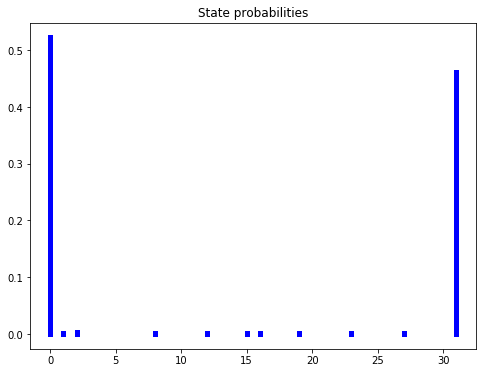

Fidelity =  0.9776806070731643


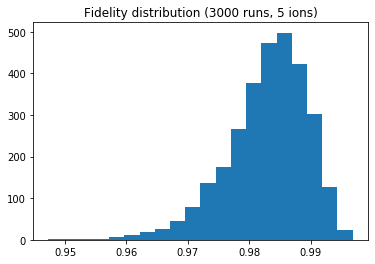

Time elapsed =  10.677432223999999 s


In [2]:
# 5-qubit circuit

N = 5

ideal_bell_circ = Circuit("Bell state (no errors)", N)

ideal_state = ideal_bell_circ.H(0).CNOT(0,1).CNOT(0,2) \
            .CNOT(0,3).CNOT(0,4).compute()


bad_bell_circ = Circuit("Bell state with errors", N)
bad_bell_circ.set_errors([0.1, 0.01, 0.1])

final_state = bad_bell_circ.H(0).CNOT(0,1).CNOT(0,2) \
            .CNOT(0,3).CNOT(0,4).compute()

title = f'State probabilities'
plt.figure(figsize=(8, 6))
prob_plot(final_state, title)

print("Fidelity = ", fidelity(final_state, ideal_state))

# Repeat a few thousand times, plot fidelity histogram

fidelities = []
runs = 3000

start = time.perf_counter()

for i in range(runs):
    final_state = bad_bell_circ.compute()
    fidelities.append(fidelity(final_state, ideal_state))

plt.title(f'Fidelity distribution ({runs} runs, {N} ions)')
plt.hist(fidelities, 20)
plt.show()

print("Time elapsed = ", time.perf_counter() - start, "s")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


18
19
20


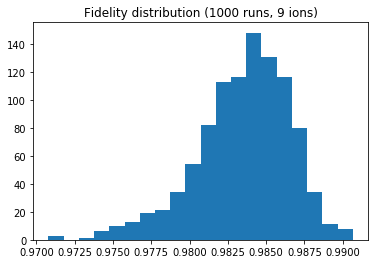

Average fidelity =  0.9835175098848208
Time elapsed =  144.075564387 s
10-th percentile fidelity = 0.9795183538417894
90-th percentile fidelity = 0.9870438511610287


In [3]:
# 9 qubits, 160 CNOT gates

start = time.perf_counter()

N = 9

circ = Circuit("Bell state", N).Y(0,pi/2)

n = 20

for j in range(n):
    for i in range(N-1):
        circ = circ.CNOT(i, i+1)
    
ideal_state = circ.compute()

err = 0.03
circ.set_errors([0.01, 0.001, err])
fidelities = []
runs = 1000

for k in range(runs):

    final_state = circ.compute()
    fidelities.append(fidelity(final_state, ideal_state))
    
    if (k % (runs / 20) == runs / 20 - 1):
        print (round(k / (runs / 20)))

plt.title(f'Fidelity distribution ({runs} runs, {N} ions)')
plt.hist(fidelities, 20)
plt.show()

# It's good practice to save your results for large circuits (> 10 qubits) due to long runtime

n_gates = (N - 1) * n
filename = f'fidelities_{N}_qubits_{n_gates}_gates.txt'

save_fidelities(fidelities, filename, N, n_gates, err, runs)

print("Average fidelity = ", sum(fidelities)/runs)
print("Time elapsed = ", time.perf_counter() - start, "s")
print(f'10-th percentile fidelity = {sort(fidelities)[int(runs/10)]}')
print(f'90-th percentile fidelity = {sort(fidelities)[int(9*runs/10)]}')

In [4]:
# # Read the fidelities

# data = read_fidelities('fidelities_10_qubits_180_gates.txt')
# plt.hist(data, 20)
# plt.show()

# sum(read_fidelities('fidelities_10_qubits_180_gates.txt'))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


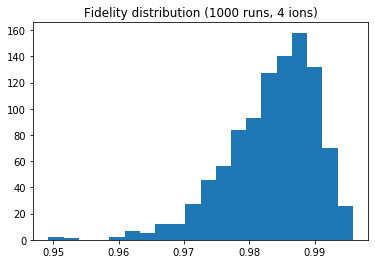

Average fidelity = 0.9834864974083778
Time elapsed =  125.22507241099993 s
10-th percentile fidelity = 0.9741892231517261
90-th percentile fidelity = 0.9910836757112585


In [13]:
# 4 qubits, 159 CNOT gates

start = time.perf_counter()

N = 4

circ = Circuit("Bell state", N).Y(0, pi/2)

n = 53

for j in range(n):
    for i in range(N-1):
        circ = circ.CNOT(i, i+1)
    
ideal_state = circ.compute()

err = 0.03
circ.set_errors([0.01, 0.001, err])
fidelities = []
runs = 1000

for k in range(runs):

    final_state = circ.compute()
    fidelities.append(fidelity(final_state, ideal_state))
    
    if (k % (runs / 20) == runs / 20 - 1):
        print (round(k / (runs / 20)))

plt.title(f'Fidelity distribution ({runs} runs, {N} ions)')
plt.hist(fidelities, 20)
plt.show()

# It's good practice to save your results for large circuits (> 10 qubits) due to long runtime

n_gates = (N - 1) * n
filename = f'fidelities_{N}_qubits_{n_gates}_gates.txt'

save_fidelities(fidelities, filename, N, n_gates, err, runs)

print(f"Average fidelity = {sum(fidelities)/runs}")
print(f"Time elapsed =  {time.perf_counter() - start} s")
print(f'10-th percentile fidelity = {sort(fidelities)[int(runs/10)]}')
print(f'90-th percentile fidelity = {sort(fidelities)[int(9*runs/10)]}')

In [ ]:
# -- Bell state generation for 16 qubits --

In [9]:
N = 16

circ1 = Circuit("Bell state gen (neighbouring)", N).Y(0, pi/2)
circ2 = Circuit("Bell state gen (non-neighbouring)", N).Y(0, pi/2)

index = 2 ** (N - 1)
for i in range(N - 1):
    circ1 = circ1.CNOT(i, i+1)
    circ2 = circ2.CNOT(0, i+1)
    index += 2 ** (N - 2 - i)

    
# -- Helper functions --

def bell_state_fid(final_state):
    return abs((final_state[0] + final_state[index])/sqrt(2)) ** 2

def run_circuit(circ, runs):
    fidelities = []
    for k in range(runs):

        final_state = circ.compute()
        fidelities.append(bell_state_fid(final_state))

        if (k % (runs / 20) == runs / 20 - 1):
            print (round(k / (runs / 20)))
            
    return fidelities
    

def print_results(N, runs, fidelities):
    # Histogram for fidelities
    plt.title(f'Fidelity distribution ({runs} runs, {N} ions)')
    plt.hist(fidelities, 20)
    plt.show()
    
    print(f"Average fidelity = {sum(fidelities)/runs}")
    print(f'10-th percentile fidelity = {sort(fidelities)[int(runs/10)]}')
    print(f'90-th percentile fidelity = {sort(fidelities)[int(9 * runs/10)]}')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


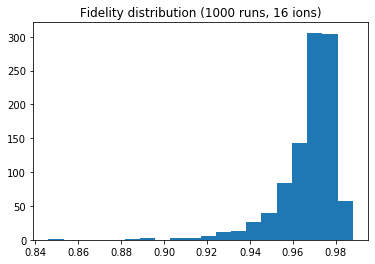

Average fidelity = 0.9673566555480244
Time elapsed =  77.980814894 s
10-th percentile fidelity = 0.951577325736908
90-th percentile fidelity = 0.9794001391599768


In [3]:
# Phase error, neighbouring CNOTs
err = 0.05
circ1.set_errors([0.0, err, 0.0])
runs = 1000

start = time.perf_counter()

fidelities = run_circuit(circ1, runs)

# Save results
filename = f'fidelities_{N}_qubits_{runs}_runs.txt'

# Summarize results
print_results(N, runs, fidelities)
print(f"Time elapsed =  {time.perf_counter() - start} s")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


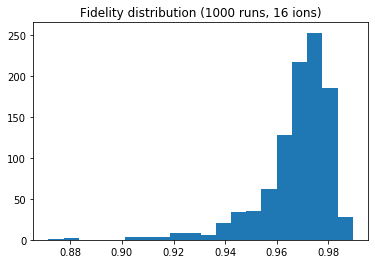

Average fidelity = 0.9674988816422653
Time elapsed =  72.11517881200007 s
10-th percentile fidelity = 0.9509333573680384
90-th percentile fidelity = 0.9805440148127232


In [9]:
# Phase error, long-distance CNOTs
err = 0.05
circ2.set_errors([0.0, err, 0.0])
runs = 1000

start = time.perf_counter()

fidelities = run_circuit(circ2, runs)

# Save results
filename = f'fidelities_{N}_qubits_{runs}_runs.txt'

# Summarize results
print_results(N, runs, fidelities)
print(f"Time elapsed =  {time.perf_counter() - start} s")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


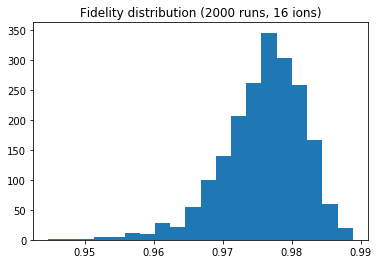

Average fidelity = 0.975877769166408
Time elapsed =  130.76015662100008 s
10-th percentile fidelity = 0.9682528676949401
90-th percentile fidelity = 0.9826894892659023


In [7]:
# Over-rotation error, neighbouring CNOTs
err = 0.05
circ1.set_errors([err, 0.0, 2 * err])
runs = 2000

start = time.perf_counter()

fidelities = run_circuit(circ1, runs)

# Save results
filename = f'fidelities_{N}_qubits_{runs}_runs.txt'

# Summarize results
print_results(N, runs, fidelities)
print(f"Time elapsed =  {time.perf_counter() - start} s")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


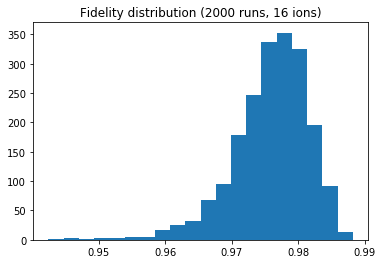

Average fidelity = 0.975870826744441
Time elapsed =  158.19749475899994 s
10-th percentile fidelity = 0.9686081406232904
90-th percentile fidelity = 0.9824670996014636


In [8]:
# Over-rotation error, long-distance CNOTs
err = 0.05
circ1.set_errors([err, 0.0, 2 * err])
runs = 2000

start = time.perf_counter()

fidelities = run_circuit(circ2, runs)

# Save results
filename = f'fidelities_{N}_qubits_{runs}_runs.txt'

# Summarize results
print_results(N, runs, fidelities)
print(f"Time elapsed =  {time.perf_counter() - start} s")

In [ ]:
# -- > 19 to 22 qubits, one run only --

In [12]:
N = 22
k = 5       # Number of CNOTs --> (k+1)-qubit Bell state

circ = Circuit(f"Bell state gen with {N} qubits", N).Y(0,pi/2)

index = 2 ** (N - 1)
for i in range(N - 1):
    circ = circ.CNOT(i, i+1)
    index += 2 ** (N - 2 - i)


# 20% errors
err = 0.1
circ.set_errors([0.05, 0.01, err])

start = time.perf_counter()
final_state = circ.compute()

# Fidelity
print("Fidelity = ", abs((final_state[0] + final_state[index])/sqrt(2)) ** 2)
print("Time elapsed = ", time.perf_counter() - start, "s")

# Save memory
final_state = 0
ideal_state = 0

Fidelity =  0.9514320930354014
Time elapsed =  17.413244994999786 s


In [13]:
# FIDELITY / STATE AS A FUNCTION OF TIME
# SMALL ROTATIONS SHOULD HAVE LARGER PERCENTAGE ERRORS